In [1]:
#import all the required libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [31]:
#loading image
image = cv2.imread('/home/krishh/Desktop/Assignement Image fig.1.png')

#making a template for the final answer
result = image

def show_image(im):
    plt.figure(figsize=(15,20))
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.show()

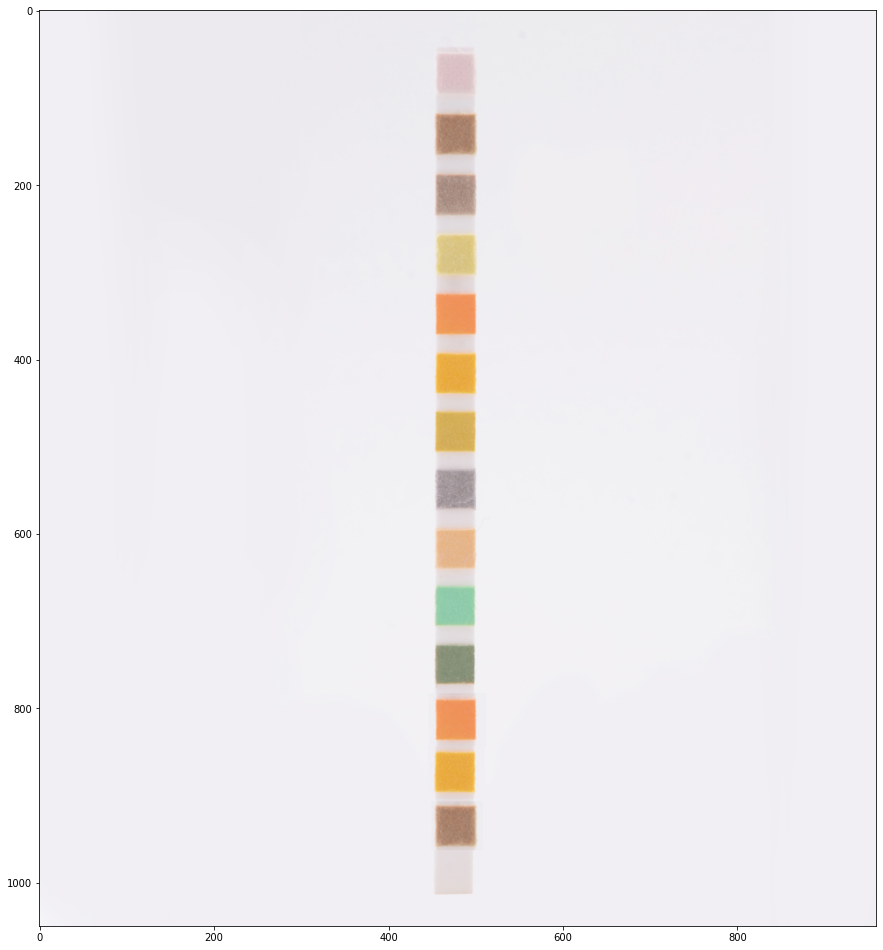

In [32]:
show_image(image)

In [33]:
#converting the image to HSV format
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#setting upper and lower bounds for contour detection
lower = np.array([7, 14, 100], dtype="uint8")
upper = np.array([179, 255, 255], dtype="uint8")
mask = cv2.inRange(image, lower, upper)

#contour detection
cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)





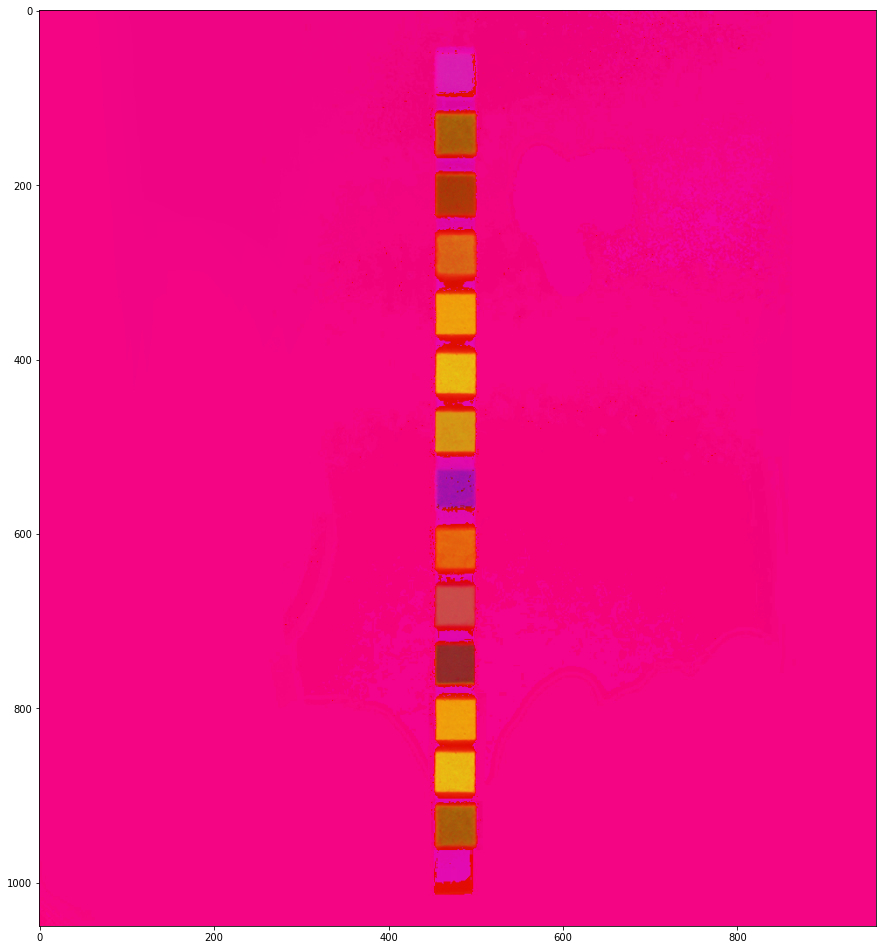

In [34]:
show_image(image)

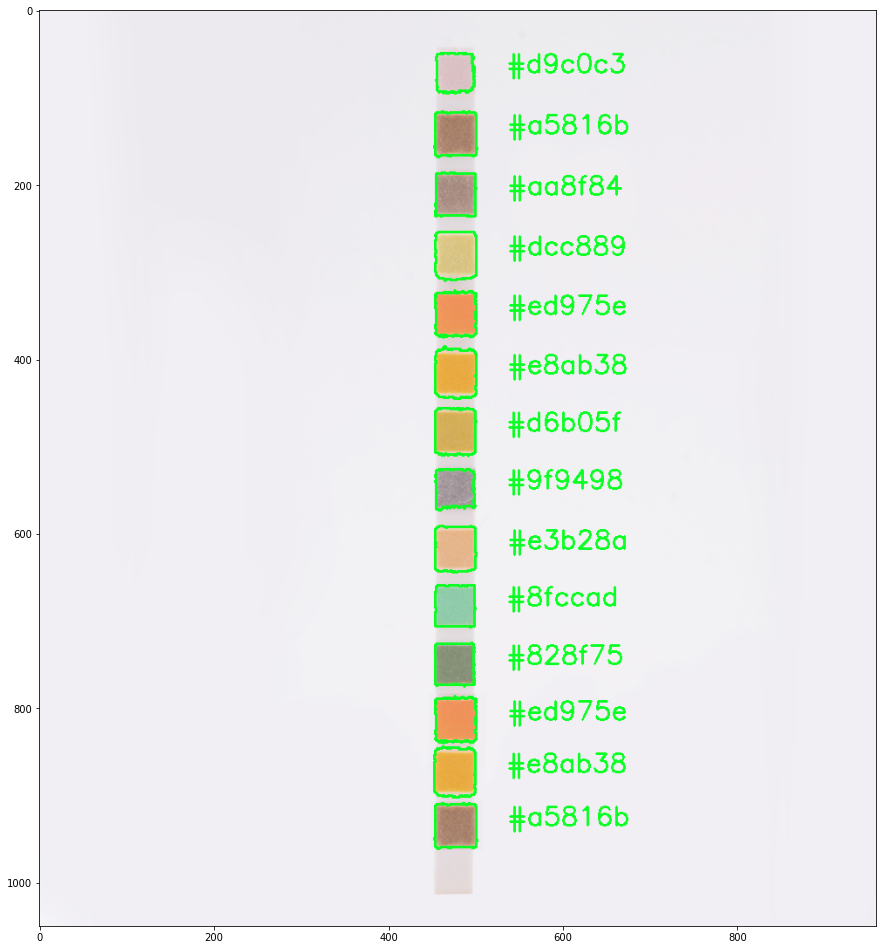

In [36]:

for c in cnts:
    
    #reducing noise and unwanted contours
    if cv2.contourArea(c) > 1800:
        M = cv2.moments(c)
        
        #getting centre coordinates of contour
        if M["m00"] != 0:
            Xi = int(M["m10"] / M["m00"])
            Yi = int(M["m01"] / M["m00"])
        else:
            Xi,Yi = 0,0

        cv2.drawContours(result, [c], -1, (36, 255, 12), 2)
        
        #getting the rgb value of contour
        b,g,r = result[Yi,Xi]
        b = int(b)
        g = int(g)
        r = int(r)
        
        #hex code
        text = "#{:02x}{:02x}{:02x}".format(r,g,b)
        
        cv2.putText(result, text, (Xi+60, Yi),
        cv2.FONT_HERSHEY_SIMPLEX, 1, (36, 255, 12), 2)
        
       


show_image(result)